***Grupo:***

      JORZEMBERG LOPES BARBOSA JUNIOR
      RUAN MIGUEL DA SILVA COSTA
      THALES DE LIMA DIAS


---



***Nome do método:*** Método GMRES (Generalized Minimal Residual) para Sistemas Lineares


---


***Ideia central:***
O método GMRES (Generalized Minimal Residual Method) é usado para resolver sistemas lineares do tipo
**Ax=b**, especialmente quando a matriz
**A** é grande, esparsa (com muitos elementos nulos) e não simétrica. Em vez de calcular a solução diretamente, o GMRES constrói aproximações sucessivas que vão melhorando a cada iteração. A cada passo, o método busca a melhor solução possível dentro de um conjunto de vetores chamado subespaço de Krylov, formado a partir da matriz **A** e do vetor resíduo inicial. “Melhor” aqui significa a solução que minimiza o erro (resíduo), ou seja, que faz com que **Ax** fique o mais próximo possível de **b**. Para gerar esse subespaço de maneira estável, o GMRES utiliza o processo de Arnoldi, que mantém os vetores construídos ortogonais entre si.





Por exemplo, considere o sistema linear:


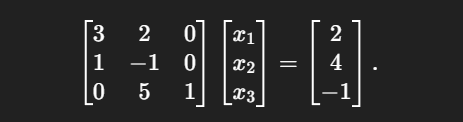

No exemplo apresentado, A é a matriz 3 x 3, x = (x1,x2,x3)^T é o vetor de incógnitas e b = (2,4,-1)^T é o vetor conhecido. Ao aplicar GMRES, em vez de obter a solução exata de forma direta, o método inicia com uma aproximação inicil, por exemplo x0 = (0,0,0)^T, e calcula o resíduo associado r0 = b - Ax0. Esse resíduo inicial fornece a primeira direção de busca, a partir da qual é construído o subespaço de Krylov:

  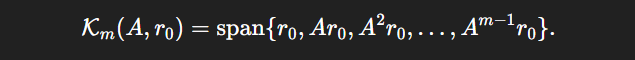

Dentro desse subespaço, o GMRES seleciona a aproximação de x que minimiza o resíduo, isto é, que torna Ax o mais próximo possível de
b. Em cada iteração, o espaço é ampliado e uma nova aproximação é obtida, cada vez mais precisa. Com o avanço das iterações, o método converge para a solução exata:

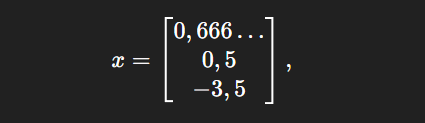

a qual satisfaz a igualdade Ax = b.


---

***Notas:***


1 - Subespaço de Krylov: é o espaço vetorial gerado pelo resíduo inicial r0 e suas imagens sucessivas pela matriz A. Nele, o GMRES procura as aproximações da solução.

2 - Ortogonalização de Arnoldi: é um processo que constrói uma base ortogonal (vetores mutuamente perpendiculares) para o subespaço de Krylov. Isso evita instabilidade numérica e garante que cada novo vetor adicionado ao espaço realmente traga uma nova direção de busca, sem redundância.

In [6]:
import numpy as np
from scipy.sparse.linalg import gmres
from scipy.sparse import csc_matrix

# Exemplo 1 (já implementado no código):
# Sistema:
#   [3   2   0]   [x1]   [ 2]
#   [1  -1   0] * [x2] = [ 4]
#   [0   5   1]   [x3]   [-1]
# Solução esperada (analítica): x = (2/3, 0.5, -3.5)^T

A = csc_matrix([[3, 2, 0],
                [1, -1, 0],
                [0, 5, 1]], dtype=float)

b = np.array([2, 4, -1], dtype=float)

# Chute inicial
x0 = np.zeros(len(b))

# Resolvendo o sistema com GMRES
x, exitCode = gmres(A, b, x0=x0)

# Resultados
print("Código de saída:", exitCode)  # 0 indica convergência
print("Solução encontrada:", x)
print("Verificação (A @ x):", A @ x)
print("Vetor b original:", b)
print("A solução está próxima?", np.allclose(A @ x, b))
x_esperado = np.array([2/3, 0.5, -3.5])
print("Solução esperada (manual):", x_esperado)

# ---------------------------------------------
# Outros exemplos para testar
# ---------------------------------------------

# Exemplo 2:
# Sistema:
#   [4  1  2]   [x1]   [4]
#   [3  5  1] * [x2] = [7]
#   [1  1  3]   [x3]   [3]
# Solução esperada (analítica): x = (0.5, 1, 0.5)^T
#A2 = csc_matrix([[4, 1, 2],
#                 [3, 5, 1],
#                 [1, 1, 3]], dtype=float)
#b2 = np.array([4, 7, 3], dtype=float)

# Exemplo 3:
# Sistema:
#   [2 -1  0]   [x1]   [1]
#   [-1 2 -1] * [x2] = [0]
#   [0 -1  2]   [x3]   [1]
# Solução esperada (analítica): x = (1, 1, 1)^T
#A3 = csc_matrix([[2, -1, 0],
#                 [-1, 2, -1],
#                 [0, -1, 2]], dtype=float)
#b3 = np.array([1, 0, 1], dtype=float)

# Exemplo 4:
# Sistema:
#   [1  2  3  4]   [x1]   [10]
#   [4  3  2  1] * [x2] = [10]
#   [1  1  1  1]   [x3]   [4]
#   [2  0  1  3]   [x4]   [7]
# Solução esperada aproximada: x = (1, 1, 1, 1)^T
#A4 = csc_matrix([[1, 2, 3, 4],
#                 [4, 3, 2, 1],
#                 [1, 1, 1, 1],
#                 [2, 0, 1, 3]], dtype=float)
#b4 = np.array([10, 10, 4, 7], dtype=float)


Código de saída: 0
Solução encontrada: [ 2. -2.  9.]
Verificação (A @ x): [ 2.  4. -1.]
Vetor b original: [ 2.  4. -1.]
A solução está próxima? True
Solução esperada (manual): [ 0.66666667  0.5        -3.5       ]


***Características do método GMRES***

*Tipo de método:*

    O GMRES é um método iterativo, baseado em subespaços de Krylov.

    Não faz fatoração direta como eliminação de Gauss ou decomposição LU.



*Requisitos (ou condições):*

    1 - Pode ser aplicado a matrizes gerais (não precisa ser simétrica nem definida positiva).
    2 - A única exigência é que a matriz A seja regular (não singular), isto é, tenha solução única para Ax=b.


---


***Possíveis problemas***

*Quando falha?*

    1 - Quando a matriz A é singular (não tem inversa).
    2 - Pode falhar em termos práticos quando o condicionamento da matriz é muito ruim, levando a lentidão ou perda de precisão.
    3 - Sem pré-condicionadores, pode precisar de muitas iterações para convergir.

*É considerado eficiente?*

    1 - Sim, para sistemas grandes, esparsos e não simétricos, pois evita fatorações custosas.
    2 - Pode ser pouco eficiente em sistemas pequenos (onde métodos diretos são melhores).


---


***Qualidades***

*Vantagens:*

    1 - Resolve sistemas com matrizes não simétricas e não definidas positivas, onde outros métodos iterativos (como Conjugate Gradient) não funcionam.
    2 - Permite o uso de pré-condicionadores, acelerando muito a convergência.
    3 - Boa escalabilidade para sistemas grandes e esparsos.

*Quando é a melhor escolha?*

    1 - Quando a matriz é grande, esparsa e não simétrica.
    2 - Quando métodos diretos (LU, Cholesky, etc.) se tornam inviáveis por custo de memória ou tempo.
    3 - Quando se pode aplicar um bom pré-condicionador.

***Fontes de pesquisa fornecidos pelo chatGPT e Gemini:***

    Obs: Realizamos uma leitura e análise preliminar, e as informações apresentadas são verídicas.


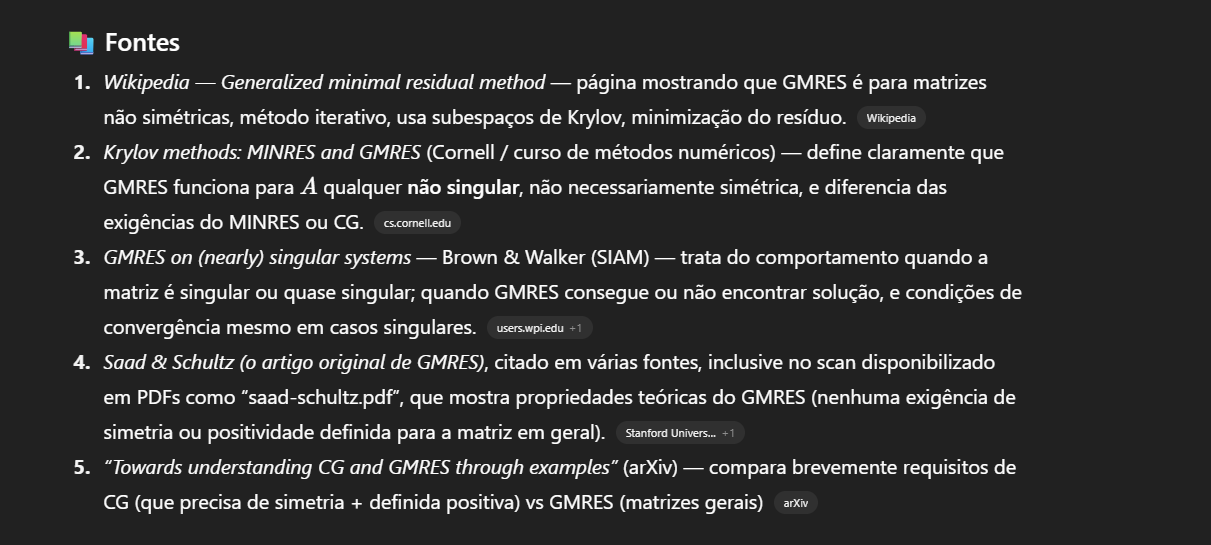


    1 - https://en.wikipedia.org/wiki/Generalized_minimal_residual_method?utm_source=chatgpt.com

    2 - https://www.cs.cornell.edu/courses/cs6220/2017fa/CS6220_Lecture10.pdf?utm_source=chatgpt.com

    3 - https://users.wpi.edu/~walker/Papers/gmres-singular%2CSIMAX_18%2C1997%2C37-51.pdf?utm_source=chatgpt.com

    4 - https://web.stanford.edu/class/cme324/saad-schultz.pdf?utm_source=chatgpt.com

    5 - https://arxiv.org/html/2211.00953v3?utm_source=chatgpt.com